# Shopper Spectrum: Customer Segmentation & Product Recommendations

##  Project Overview
In the fast-paced world of e-commerce, understanding customer behavior is crucial. This project aims to:
- Segment customers based on their shopping behavior using RFM analysis
- Recommend products using item-based collaborative filtering
- Help businesses improve targeting, loyalty programs, and customer experience

**Problem Statement:**  
E-commerce platforms often lack targeted engagement with customers. This project segments customers using RFM (Recency, Frequency, Monetary) analysis and recommends products using collaborative filtering.

**Goals:**
- Segment users into behavior-based clusters
- Recommend products based on similarity
- Present insights visually using EDA



##  Step 1: Dataset Loading

- In this project we have used dataset  of online_retail shopping data for analysis and recommendations.


##  Step 2: Data Cleaning

To ensure our analysis is accurate, we must first remove:
- Missing or null `CustomerID` values (we can't analyze these customers)
- Cancelled orders (InvoiceNo starts with 'C')
- Transactions with negative or zero quantity or price
- Duplicate entries

This ensures our customer insights are based on high-quality, reliable data.

In [ ]:
# Step 1: Dataset Load + Overview
#  Import libraries
import pandas as pd

#  Load dataset (adjust path if needed)
df = pd.read_csv('/content/online_retail.csv', encoding='ISO-8859-1')

#  Show first 5 rows
print("🔹 First 5 Rows:")
print(df.head())

#  Dataset structure
print("\n🔹 Dataset Info:")
df.info()

#  Shape
print("\n🔹 Dataset Shape:", df.shape)

#  Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

#  Duplicate Rows
duplicate_count = df.duplicated().sum()
print("\n🔹 Duplicate Rows:", duplicate_count)

🔹 First 5 Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23522 entries, 0 to 23521
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  


In [ ]:
# Step 2: Clean the Data
#  1. Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

#  2. Remove cancelled invoices (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

#  3. Remove rows with Quantity <= 0 or UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#  4. Remove duplicate rows (optional)
df = df.drop_duplicates()

#  5. Convert CustomerID to string (important for RFM grouping)
df['CustomerID'] = df['CustomerID'].astype(str)

#  6. Show cleaned data summary
print(" Cleaned Data Shape:", df.shape)
print(" Columns:", df.columns.tolist())


 Cleaned Data Shape: (14638, 8)
 Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
# Save cleaned dataset to CSV
df.to_csv("online_retail_cleaned.csv", index=False)

# Confirm it's saved
print("✅ Cleaned dataset saved as 'online_retail_cleaned.csv'")

✅ Cleaned dataset saved as 'online_retail_cleaned.csv'


In [ ]:
from google.colab import files
files.download("online_retail_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


##  Step 3: Exploratory Data Analysis (EDA)

EDA helps us understand:
- Where the sales are coming from (countries)
- Which products sell the most
- Trends in customer activity over time
- Revenue patterns across transactions and customers

These insights guide our feature engineering and modeling strategy.


/tmp/ipython-input-1287948902.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


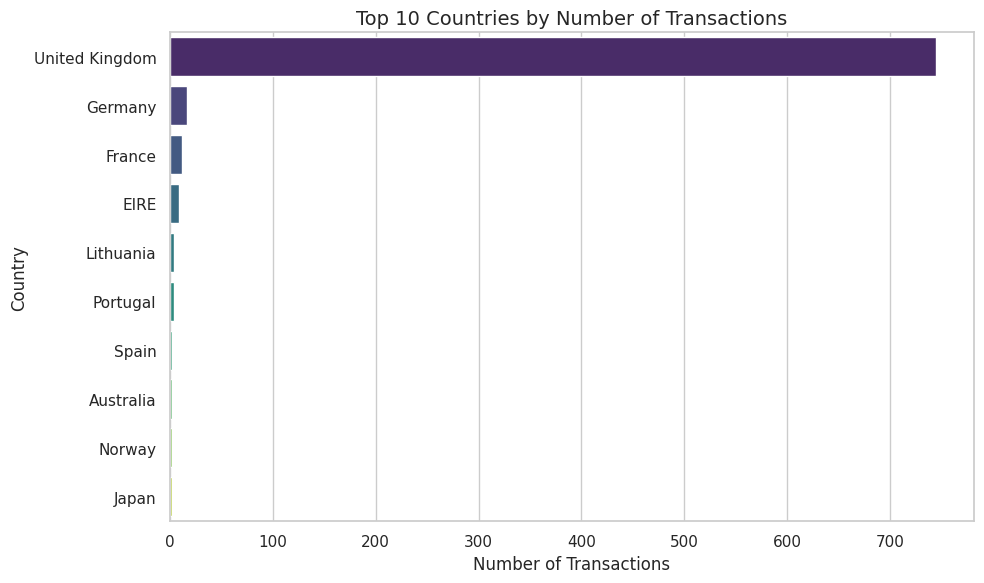

In [ ]:
# EDA Step 3.1: Transaction Volume by Country
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

#  Count unique InvoiceNo per Country
country_orders = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

#  Plot top 10 countries by transactions
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_orders.head(10).values,
    y=country_orders.head(10).index,
    palette='viridis'
)
plt.title('Top 10 Countries by Number of Transactions', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1891906017.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


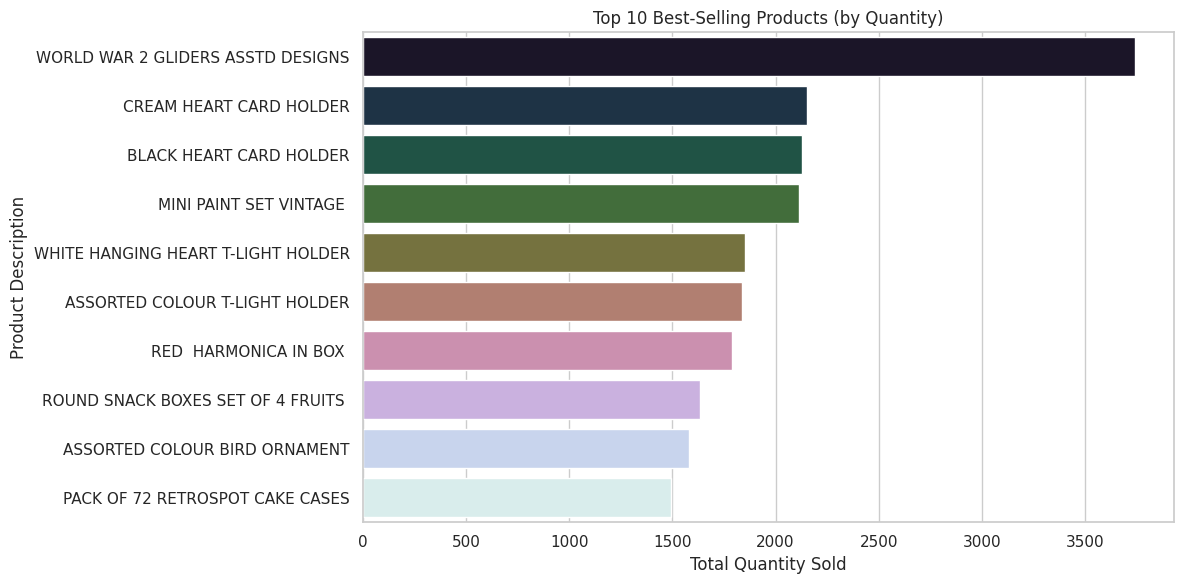

In [ ]:
# STEP 3.2: Top-Selling Products
# Group by product Description and sum the Quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Get top 10 products
top_10_products = top_products.head(10)

# Plot the top 10 best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_products.values,
    y=top_10_products.index,
    palette='cubehelix'
)
plt.title('Top 10 Best-Selling Products (by Quantity)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

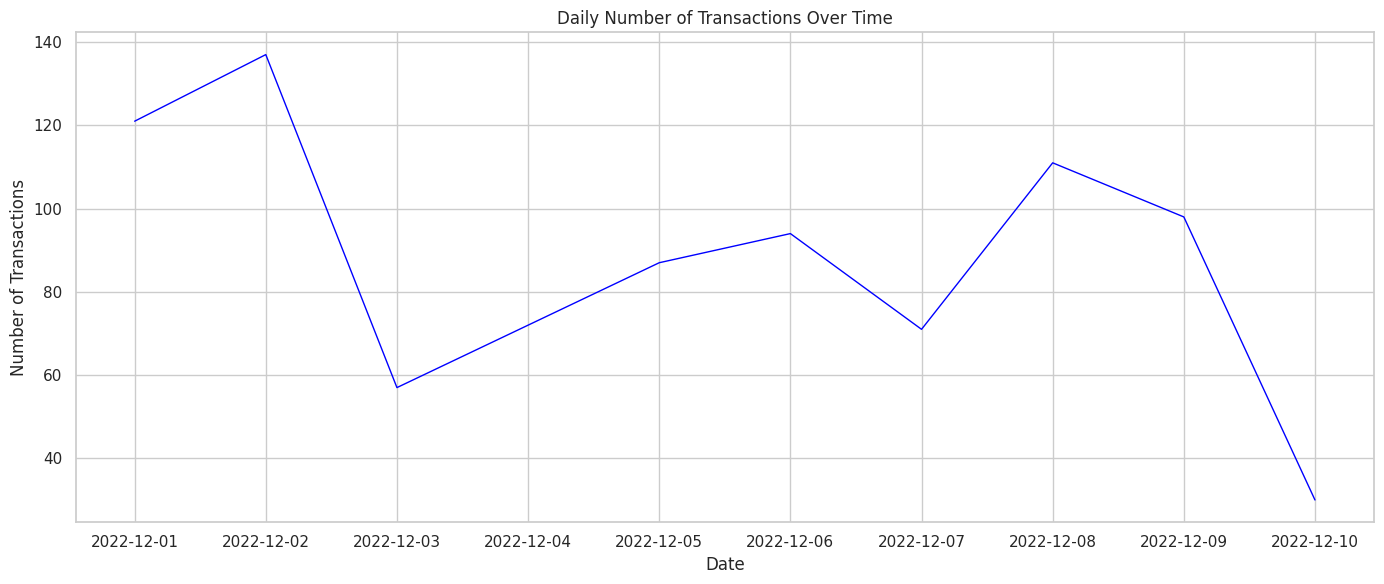

In [ ]:
# STEP 3.3: Purchase Trends Over Time
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract only the date part (drop time)
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Group by date and count unique invoices
daily_orders = df.groupby('InvoiceDay')['InvoiceNo'].nunique()

# Plot the daily number of transactions
plt.figure(figsize=(14, 6))
daily_orders.plot(color='blue', linewidth=1)
plt.title('Daily Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

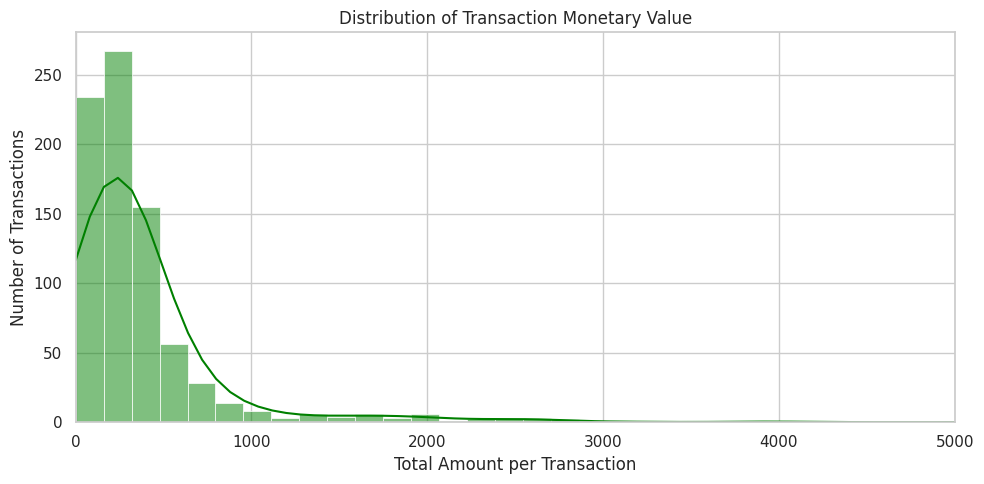

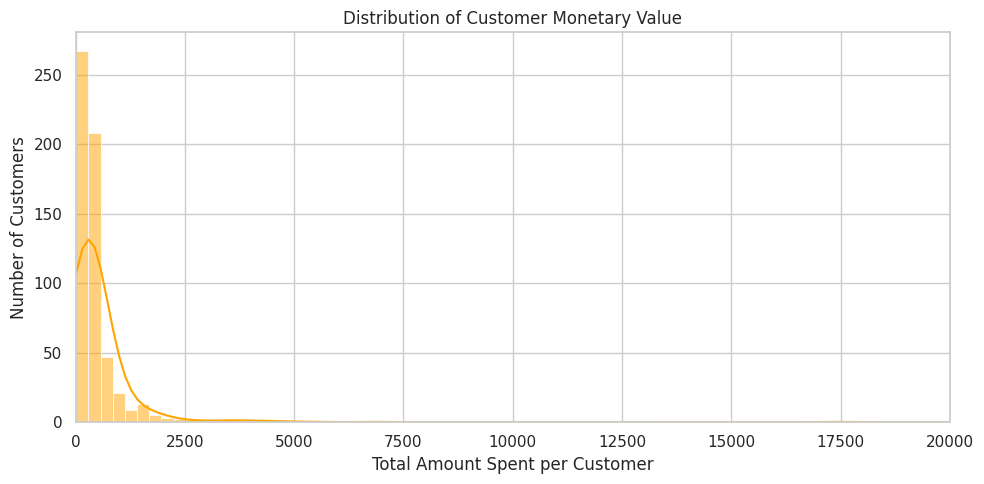

In [ ]:
# STEP 3.4: Monetary Value per Transaction and Customer
# Create a new column: Total amount per line item
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Total amount per transaction (InvoiceNo)
transaction_amounts = df.groupby('InvoiceNo')['TotalAmount'].sum()

# Plot distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(transaction_amounts, bins=100, kde=True, color='green')
plt.title('Distribution of Transaction Monetary Value')
plt.xlabel('Total Amount per Transaction')
plt.ylabel('Number of Transactions')
plt.xlim(0, 5000)  # Optional: limit extreme outliers for visibility
plt.tight_layout()
plt.show()

# Total amount per customer
customer_spending = df.groupby('CustomerID')['TotalAmount'].sum()

# Plot distribution of customer spending
plt.figure(figsize=(10, 5))
sns.histplot(customer_spending, bins=100, kde=True, color='orange')
plt.title('Distribution of Customer Monetary Value')
plt.xlabel('Total Amount Spent per Customer')
plt.ylabel('Number of Customers')
plt.xlim(0, 20000)  # Optional: limit for better view
plt.tight_layout()
plt.show()

## Step 4: RFM Analysis

RFM is a business technique to understand customer value:
- **Recency**: Days since last purchase
- **Frequency**: How often the customer buys
- **Monetary**: How much the customer spends

These features allow us to group customers based on behavior and identify high-value or at-risk segments.



In [ ]:
# STEP 4: RFM Feature Engineering (Recency, Frequency, Monetary)
import datetime as dt

# Set reference date (latest date in the dataset + 1)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by CustomerID and compute RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalAmount': 'sum'                                        # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# View top rows
print("RFM table:\n", rfm.head())

RFM table:
             Recency  Frequency  Monetary
CustomerID                              
12347.0           3          1    711.79
12386.0           3          1    258.90
12395.0           7          1    346.10
12427.0           8          1    303.50
12429.0           1          1   1281.50


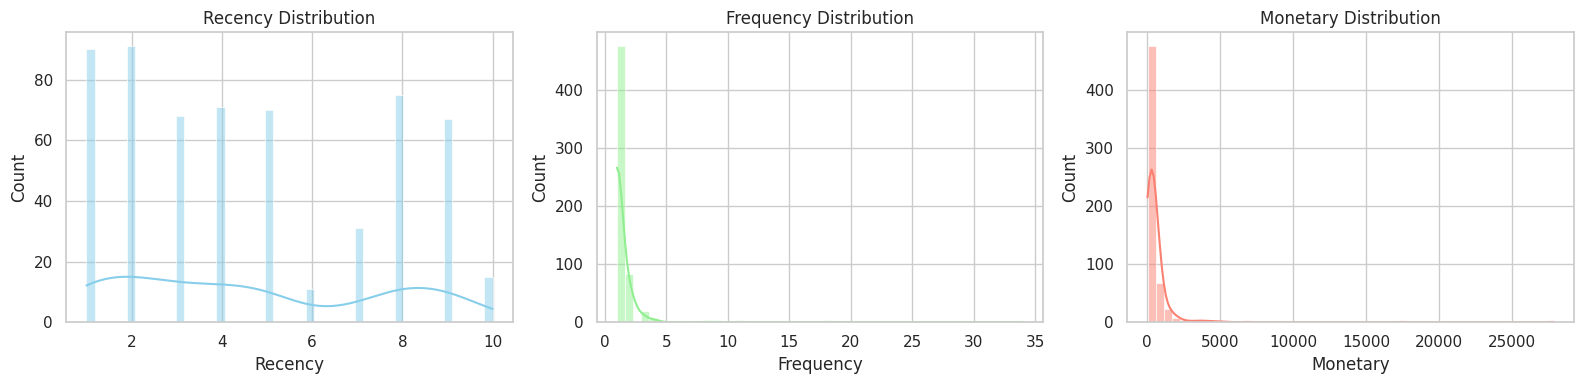

In [ ]:
# Step 4.1: RFM Distribution Visualization
# Plot RFM value distributions
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, kde=True, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, kde=True, color='lightgreen')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, kde=True, color='salmon')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

## Step 5: Customer Segmentation via KMeans

KMeans groups customers into segments using scaled RFM features.  
We use the Elbow method to decide the number of clusters and assign each customer a label.

Using clustering, we can automatically group customers into behavior-based segments:
- High-Value
- Regular
- Occasional
- At-Risk

This allows targeted marketing strategies and better business decision-making.


In [ ]:
# STEP 5: RFM Normalization and KMeans Clustering
# Step 5.1: Normalize RFM Features
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale RFM values
rfm_scaled = scaler.fit_transform(rfm)

# Convert back to DataFrame for reference
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

# Show few rows
print(rfm_scaled_df.head())

             Recency  Frequency  Monetary
CustomerID                               
12347.0    -0.582743  -0.214781  0.107480
12386.0    -0.582743  -0.214781 -0.199328
12395.0     0.819650  -0.214781 -0.140255
12427.0     1.170248  -0.214781 -0.169114
12429.0    -1.283940  -0.214781  0.493428


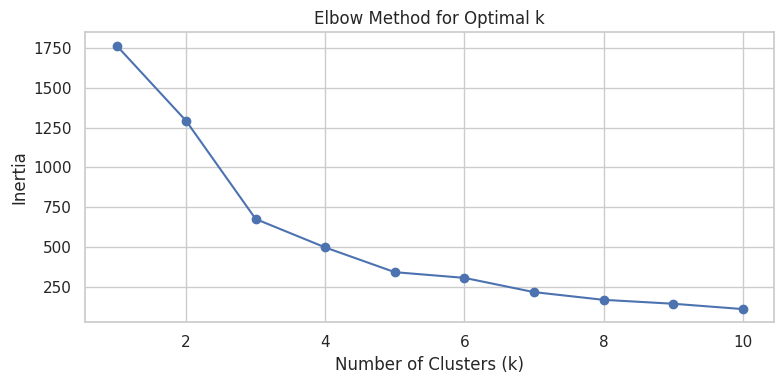

In [ ]:
# Step 5.2: Elbow Method to Choose Optimal k
from sklearn.cluster import KMeans
import numpy as np

# Try different values of k to find the optimal one
inertia = []
k_values = range(1, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled_df)
    inertia.append(model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 5.3: Apply KMeans Clustering
# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled_df)

# Assign cluster labels to original RFM table
rfm['Cluster'] = kmeans.labels_

# Show sample results
print(rfm.groupby('Cluster').mean().round(2))

         Recency  Frequency  Monetary
Cluster                              
0           8.22       1.13    382.54
1           2.86       1.31    493.93
2           1.25      10.50  13501.54
3           8.00      34.00   5391.21


## Step 6: Product Recommendation

We use **item-based collaborative filtering** with cosine similarity to suggest 5 products similar to the one a customer selects.

To improve customer experience, we recommend products based on what other similar users have purchased.




In [ ]:
# STEP 6: Product Recommendation System
# Step 6.1: Build Customer–Product Matrix
# Create Customer-Product matrix (pivot table)
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Display shape and sample
print("Matrix shape:", customer_product_matrix.shape)
customer_product_matrix.head()

Matrix shape: (589, 2024)


StockCode   10002  10120  10123C  10124A  10124G  10125  10133  10135  11001  \
CustomerID                                                                     
12347.0       0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   
12386.0       0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   
12395.0       0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   
12427.0       0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   
12429.0       0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   

StockCode   15034  ...  90214C  90214J  90214K  90214M  90214S  90214V  \
CustomerID         ...                                                   
12347.0       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
12386.0       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
12395.0       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
12427.0       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
12429.0       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

StockCode   BANK CHARGES   C2    M  POST  
CustomerID                                
12347.0              0.0  0.0  0.0   0.0  
12386.0              0.0  0.0  0.0   0.0  
12395.0              0.0  0.0  0.0   2.0  
12427.0              0.0  0.0  0.0   3.0  
12429.0              0.0  0.0  0.0   8.0  

[5 rows x 2024 columns]

In [ ]:
import pickle

# Create the Customer–Product matrix
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Save to pickle
with open("customer_product_matrix.pkl", "wb") as f:
    pickle.dump(customer_product_matrix, f)

print("✅ customer_product_matrix.pkl saved.")

✅ customer_product_matrix.pkl saved.


In [ ]:
# Step 6.2: Compute Cosine Similarity Between Products
from sklearn.metrics.pairwise import cosine_similarity

# Transpose the matrix: products as rows
product_similarity = cosine_similarity(customer_product_matrix.T)

# Convert to DataFrame for easier lookup
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

# Check shape and values
product_similarity_df.head()

StockCode     10002     10120   10123C  10124A  10124G  10125     10133  \
StockCode                                                                 
10002      1.000000  0.001164  0.01426     0.0     0.0    0.0  0.000000   
10120      0.001164  1.000000  0.08165     0.0     0.0    0.0  0.060978   
10123C     0.014260  0.081650  1.00000     0.0     0.0    0.0  0.000000   
10124A     0.000000  0.000000  0.00000     1.0     0.0    0.0  0.000000   
10124G     0.000000  0.000000  0.00000     0.0     1.0    0.0  0.000000   

StockCode  10135  11001  15034  ...  90214C  90214J  90214K  90214M  90214S  \
StockCode                       ...                                           
10002        0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0   
10120        0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0   
10123C       0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0   
10124A       0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0   
10124G       0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0   

StockCode  90214V  BANK CHARGES   C2         M      POST  
StockCode                                                 
10002         0.0           0.0  0.0  0.000000  0.223172  
10120         0.0           0.0  0.0  0.056638  0.000000  
10123C        0.0           0.0  0.0  0.000000  0.000000  
10124A        0.0           0.0  0.0  0.000000  0.000000  
10124G        0.0           0.0  0.0  0.000000  0.000000  

[5 rows x 2024 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between products
product_similarity = cosine_similarity(customer_product_matrix.T)

# Convert to DataFrame
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

# Save to pickle
with open("product_similarity_df.pkl", "wb") as f:
    pickle.dump(product_similarity_df, f)

print("✅ product_similarity_df.pkl saved.")

✅ product_similarity_df.pkl saved.


In [ ]:
# Step 6.3: Get Similar Products Function
# Recommend top 5 similar products based on a given StockCode
def get_similar_products(product_code, n=5):
    if product_code not in product_similarity_df.columns:
        return "Product not found in database"
    similar_scores = product_similarity_df[product_code].sort_values(ascending=False)
    return similar_scores.iloc[1:n+1]  # skip the first one (itself)

# Example usage
print(get_similar_products('85123A'))  # Replace with a valid StockCode

StockCode
84029E    0.666360
82615     0.619368
21864     0.618682
15056P    0.617628
22095     0.617489
Name: 85123A, dtype: float64


In [ ]:
# Assuming you already have:
# - rfm_scaled_df from StandardScaler
# - kmeans model from KMeans(n_clusters=4)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("✅ scaler.pkl and kmeans_model.pkl saved.")

✅ scaler.pkl and kmeans_model.pkl saved.


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
# STEP 7: Streamlit App Development
import streamlit as st
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Load preprocessed data and models (placeholders for now)
@st.cache_data
def load_data():
    df = pd.read_csv('online_retail_cleaned.csv')  # Your cleaned dataset
    customer_product_matrix = pd.read_pickle('customer_product_matrix.pkl')
    product_similarity_df = pd.read_pickle('product_similarity_df.pkl')
    rfm_model = pd.read_pickle('kmeans_model.pkl')
    scaler = pd.read_pickle('scaler.pkl')
    return df, customer_product_matrix, product_similarity_df, rfm_model, scaler

df, customer_product_matrix, product_similarity_df, rfm_model, scaler = load_data()

st.title(" Shopper Spectrum: Product Recommender & Customer Segmentation")

# Tabs
tab1, tab2 = st.tabs(["Product Recommendation", "Customer Segmentation"])

# -------------------- TAB 1 --------------------
with tab1:
    st.header(" Product Recommendation")
    product_id = st.text_input("Enter Product StockCode (e.g., 85123A):")

    if st.button("Get Recommendations"):
        if product_id not in product_similarity_df.columns:
            st.warning("Product not found. Please try another StockCode.")
        else:
            similar_products = product_similarity_df[product_id].sort_values(ascending=False).iloc[1:6]
            st.success("Top 5 Similar Products:")
            for pid in similar_products.index:
                desc = df[df['StockCode'] == pid]['Description'].values[0]
                st.markdown(f"- **{pid}** → {desc}")

# -------------------- TAB 2 --------------------
with tab2:
    st.header(" Customer Segmentation")

    r = st.number_input("Recency (days since last purchase):", min_value=0)
    f = st.number_input("Frequency (number of purchases):", min_value=0)
    m = st.number_input("Monetary (total spend):", min_value=0)

    if st.button("Predict Segment"):
        input_scaled = scaler.transform([[r, f, m]])
        cluster_label = rfm_model.predict(input_scaled)[0]

        # Mapping cluster labels to segments (adjust if needed)
        segment_map = {
            0: "High-Value",
            1: "Regular",
            2: "Occasional",
            3: "At-Risk"
        }
        st.success(f"Predicted Segment: **{segment_map.get(cluster_label, 'Unknown')}**")



Overwriting app.py


In [ ]:
from google.colab import files
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##  Summary & Business Insights

- Most customers are concentrated in the UK.
- Top-selling items are gift-related products.
- High-value customers have low Recency, high Frequency, and spend significantly.
- The recommendation engine suggests similar products effectively using customer purchase patterns.

**Use Case:**  
This type of analysis is commonly used in platforms like Amazon and Flipkart to personalize the user experience, improve sales, and reduce churn.
